In [1]:
import pickle
from tqdm.notebook import tqdm

In [2]:
datasets = ['chosun_first', 'chosun_second', 'chosun_last', 'donga_first', 'donga_second', 'donga_last']

In [3]:
from collections import Counter

with open('./data/counter.pkl', 'rb') as f:
    data0 = Counter(pickle.load(f))

In [59]:
data0

Counter({'chosun_first': Counter({('것', 'NNB'): 900182,
                  ('일', 'NNB'): 500913,
                  ('등', 'NNB'): 410465,
                  ('수', 'NNB'): 322541,
                  ('이', 'NNP'): 304299,
                  ('씨', 'NNB'): 235682,
                  ('말', 'NNG'): 210889,
                  ('명', 'NNB'): 209744,
                  ('시', 'NNB'): 169525,
                  ('한국', 'NNP'): 161109,
                  ('을', 'NNG'): 159992,
                  ('때', 'NNG'): 153803,
                  ('한', 'NNP'): 143127,
                  ('원', 'NNB'): 125931,
                  ('개', 'NNB'): 124722,
                  ('서울', 'NNP'): 122501,
                  ('중', 'NNB'): 111767,
                  ('김', 'NNP'): 111744,
                  ('년', 'NNB'): 110874,
                  ('문제', 'NNG'): 110557,
                  ('미', 'NNP'): 110035,
                  ('때문', 'NNB'): 109658,
                  ('미국', 'NNP'): 108118,
                  ('분', 'NNB'): 107553,
                  (

# 새 데이터 셋으로 아래 코드 실행하세요 위에 코드는 무시하시고

In [ ]:
from collections import Counter

data0 = {}
for dataset in tqdm(datasets):
    with open('./data/' + dataset + '.pkl', 'rb') as f:
        data0[dataset] = Counter(pickle.load(f))

In [4]:
data1 = {}
for dataset in tqdm(data0.keys()):
    for k,v in data0[dataset].items():
        if k[0] in data1.keys():
            data1[k[0]].append((dataset, v))
        else:
            data1[k[0]] = [(dataset, v)]

with open('./data/data1.pkl', 'wb') as f:
    pickle.dump(data1, f)

  0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
data1

{'새해': [('chosun_first', 2874),
  ('chosun_first', 1915),
  ('chosun_second', 1252),
  ('chosun_second', 2117),
  ('chosun_last', 1969),
  ('chosun_last', 903),
  ('donga_first', 2874),
  ('donga_first', 1915),
  ('donga_second', 1252),
  ('donga_second', 2117),
  ('donga_last', 1969),
  ('donga_last', 903)],
 '국민': [('chosun_first', 66058),
  ('chosun_first', 19668),
  ('chosun_second', 53201),
  ('chosun_second', 13019),
  ('chosun_last', 36271),
  ('chosun_last', 8679),
  ('donga_first', 66058),
  ('donga_first', 19668),
  ('donga_second', 53201),
  ('donga_second', 13019),
  ('donga_last', 36271),
  ('donga_last', 8679)],
 '경제': [('chosun_first', 17238),
  ('chosun_first', 54025),
  ('chosun_second', 69925),
  ('chosun_second', 22101),
  ('chosun_last', 51887),
  ('chosun_last', 16363),
  ('donga_first', 17238),
  ('donga_first', 54025),
  ('donga_second', 69925),
  ('donga_second', 22101),
  ('donga_last', 51887),
  ('donga_last', 16363)],
 '기상': [('chosun_first', 2525),
  ('chosu

In [9]:
data2 = {}
for word, v in data1.items():
    if set(datasets) == set([x[0] for x in v]):
        r1 = []
        for dataset in datasets[:3]:
            v1 = filter(lambda x: x[0] == dataset, v)
            s = sum([x[1] for x in v1])
            r1.append(s)
        r2 = []
        for dataset in datasets[3:]:
            v1 = filter(lambda x: x[0] == dataset, v)
            s = sum([x[1] for x in v1])
            r2.append(s)
        s = sum(r1 + r2)
        r = {'chosun': r1, 'donga': r2, 'sum': s}
        data2[word] = r

In [18]:
def norm_sum(x, y):
    sx = sum(x)
    sy = sum(y)
    return [(x/sx + y/sy)/2 for x, y in zip(x, y)]


def deltas(x):
    r = []
    for i in range(len(x)-1):
        r.append(abs(x[i+1] - x[i]))
    r.append(abs(x[0] - x[-1]))
    return r

In [19]:
data3 = []

for word, v in data2.items():
    T = max(deltas(norm_sum(v['chosun'], v['donga'])))
    data3.append([word, v['chosun'], v['donga'], v['sum'], T])

In [61]:
data4

[['중공', [54437, 620, 401], [54437, 620, 401], 110916, 0.9743589743589743],
 ['국민회의', [370, 333, 27779], [370, 333, 27779], 56964, 0.9636261498490275],
 ['한당', [10822, 497, 223], [10822, 497, 223], 23084, 0.9182983884941952],
 ['농수산부', [4079, 217, 101], [4079, 217, 101], 8794, 0.9047077552876962],
 ['구조조정', [200, 813, 10412], [200, 813, 10412], 22850, 0.8938293216630198],
 ['버마', [4203, 286, 106], [4203, 286, 106], 9190, 0.8916213275299238],
 ['레이건', [21271, 1305, 698], [21271, 1305, 698], 46548, 0.8839477528572656],
 ['거즈', [3089, 106, 199], [3089, 106, 199], 6788, 0.8789039481437831],
 ['베이루트', [4297, 397, 144], [4297, 397, 144], 9676, 0.8584125671765191],
 ['이민우', [3391, 199, 173], [3391, 199, 173], 7526, 0.8551687483390911],
 ['코피', [2757, 179, 140], [2757, 179, 140], 6152, 0.8507802340702211],
 ['넷', [174, 197, 3091], [174, 197, 3091], 6924, 0.842576545349509],
 ['스카웃', [2192, 148, 120], [2192, 148, 120], 4920, 0.8422764227642277],
 ['슐츠', [2981, 190, 169], [2981, 190, 169], 6680, 

In [60]:
import pickle

with open('./data/main4_result.pkl', 'rb') as f:
    D = pickle.load(f)

In [68]:
len(D)

3997

In [69]:
len(data4)

20246

In [20]:
data4 = list(filter(lambda x: min(x[1] + x[2]) > 100, data3))
data4.sort(key=lambda x: x[4], reverse=True)

In [62]:
dict_data = {}
for word, c, d, s, t in D:
    dict_data[word] = {'chosun': c, 'donga': d, 'sum': s, 'T': t}

In [63]:
'' in dict_data.keys()

False

In [64]:
dict_data['']

KeyError: ''

In [65]:
def visualize_words(dict_data, *words):
    import matplotlib.pyplot as plt
    from matplotlib import rc
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False

    for word in words:
        plt.plot(list(range(1, 4)), dict_data[word]['chosun'], 'o-', label=f"{word} chosun")
        # plt.plot(list(range(1, 4)), dict_data[word]['donga'], 'x-', label=f"{word} donga")

        for i in range(3):
            height = dict_data[word]['chosun'][i]
            plt.text(i+1, height + 0.25, '%d' %height, ha='center', va='bottom', size = 12)
            # height = dict_data[word]['donga'][i]
            # plt.text(i+1, height + 0.25, '%d' %height, ha='center', va='bottom', size = 12)
    
    r = []
    for word in words:
        r += dict_data[word]['chosun'] + dict_data[word]['donga']
    m = max(r)

    plt.ylim(0, 1.1*m)
    plt.legend()
    plt.show()

KeyError: '월남'

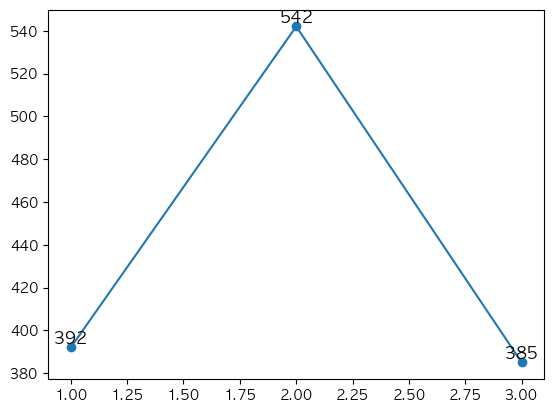

In [66]:
visualize_words(dict_data, '베트남', '월남', '하노이')